In [121]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

# Завантаження даних
data = fetch_california_housing()

# Перетворення на DataFrame для зручності
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target


In [122]:
# Розділення на навчальні та тестові дані
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], df['Target'], test_size=0.2, random_state=42)


In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Ініціалізація та тренування моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [124]:
# Прогнозування на тестовій вибірці
y_pred = model.predict(X_test)

# Оцінка продуктивності моделі
mse = mean_squared_error(y_test, y_pred)  # Середньоквадратична помилка
r2 = r2_score(y_test, y_pred)  # Коефіцієнт детермінації R^2

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.555891598695244
R^2 Score: 0.5757877060324511


In [125]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

alphas = [0.01, 0.1, 1, 10, 100]  # Різні значення параметра регуляризації
ridge_scores = {}
ridge_mse_values = []

# Перебір різних значень alpha
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    # Використання крос-валідації для оцінки моделі
    cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse = -np.mean(cv_scores)  
    ridge_scores[alpha] = mse  
    ridge_mse_values.append(mse)  
    print(f"Ridge Regression (alpha={alpha}) - CV Mean Squared Error: {mse}")


Ridge Regression (alpha=0.01) - CV Mean Squared Error: 0.5192651762720948
Ridge Regression (alpha=0.1) - CV Mean Squared Error: 0.5192649538042484
Ridge Regression (alpha=1) - CV Mean Squared Error: 0.5192628644116297
Ridge Regression (alpha=10) - CV Mean Squared Error: 0.5192548258531771
Ridge Regression (alpha=100) - CV Mean Squared Error: 0.519990120386619


In [126]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_scores = {}
lasso_mse_values = []

# Перебір різних значень alpha для Lasso
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    # Використання крос-валідації для оцінки моделі
    cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse = -np.mean(cv_scores)  
    lasso_scores[alpha] = mse  
    lasso_mse_values.append(mse)  
    print(f"Lasso Regression (alpha={alpha}) - CV Mean Squared Error: {mse}")


Lasso Regression (alpha=0.01) - CV Mean Squared Error: 0.5245456590155678
Lasso Regression (alpha=0.1) - CV Mean Squared Error: 0.6034418884128859
Lasso Regression (alpha=1) - CV Mean Squared Error: 0.9489171123085203
Lasso Regression (alpha=10) - CV Mean Squared Error: 1.3361738337897509
Lasso Regression (alpha=100) - CV Mean Squared Error: 1.3369296823892636


Найкраще значення параметра регуляризації 𝛼 - Ridge Regression зі значенням 10, яке дало найнижчий середньоквадратичний показник помилки (CV MSE = 0.5192548258531771).

In [127]:
# Використання оптимального значення alpha для Ridge
best_alpha_ridge = 10  # Найкраще значення
ridge_final = Ridge(alpha=best_alpha_ridge)
ridge_final.fit(X_train, y_train)
y_pred_ridge_final = ridge_final.predict(X_test)

# Оцінка продуктивності моделі
mse_ridge_final = mean_squared_error(y_test, y_pred_ridge_final)
r2_ridge_final = r2_score(y_test, y_pred_ridge_final)

print(f"Ridge Regression - Test MSE: {mse_ridge_final}, R^2 Score: {r2_ridge_final}")


Ridge Regression - Test MSE: 0.5550405537343004, R^2 Score: 0.576437155918002


Ridge Regression показала невелике покращення в продуктивності в порівнянні з базовими значеннями , що вказує на ефективність використання регуляризації для запобігання перенавчанню.

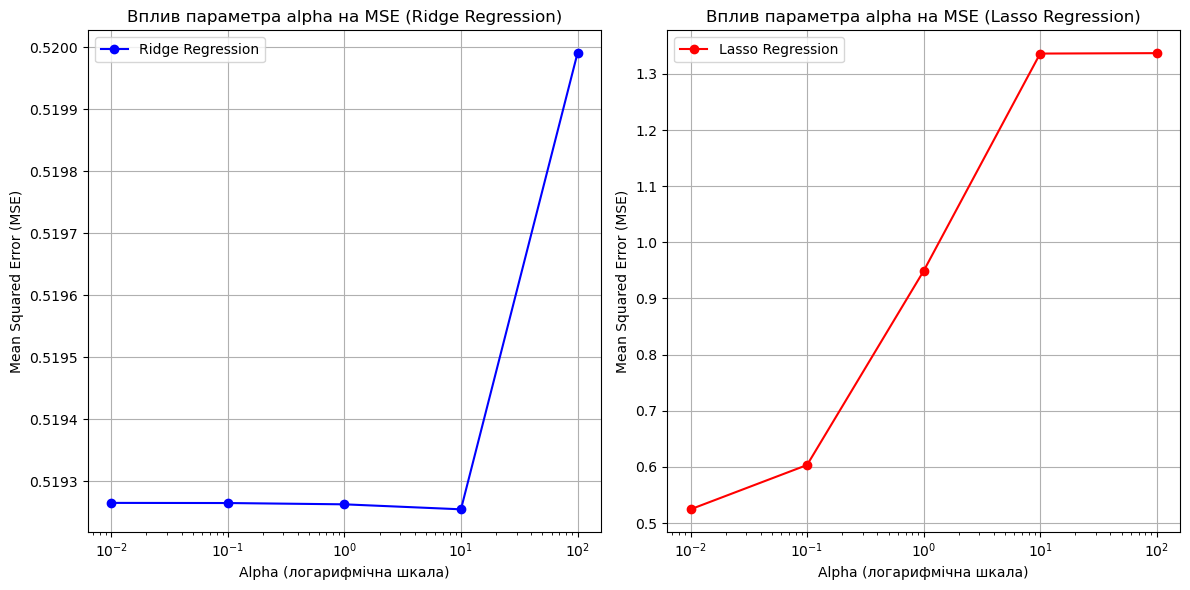

In [128]:
import matplotlib.pyplot as plt
# Графік для Ridge Regression
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_mse_values, marker='o', color='b', label='Ridge Regression')
plt.xscale('log')  # Логарифмічна шкала для осі X
plt.title('Вплив параметра alpha на MSE (Ridge Regression)')
plt.xlabel('Alpha (логарифмічна шкала)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()

# Графік для Lasso Regression
plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_mse_values, marker='o', color='r', label='Lasso Regression')
plt.xscale('log')  # Логарифмічна шкала для осі X
plt.title('Вплив параметра alpha на MSE (Lasso Regression)')
plt.xlabel('Alpha (логарифмічна шкала)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Графіки показали, що Ridge Regression досягає кращих результатів при певних значеннях 𝛼, тоді як Lasso Regression демонструє значне погіршення продуктивності з підвищенням 𝛼.

c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

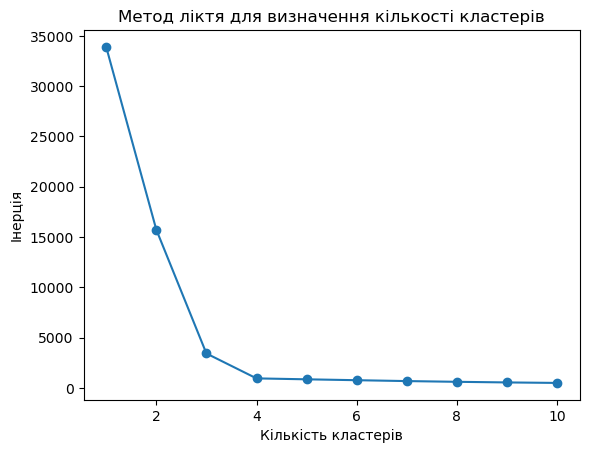

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Метод ліктя для визначення кількості кластерів')
plt.show()




c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

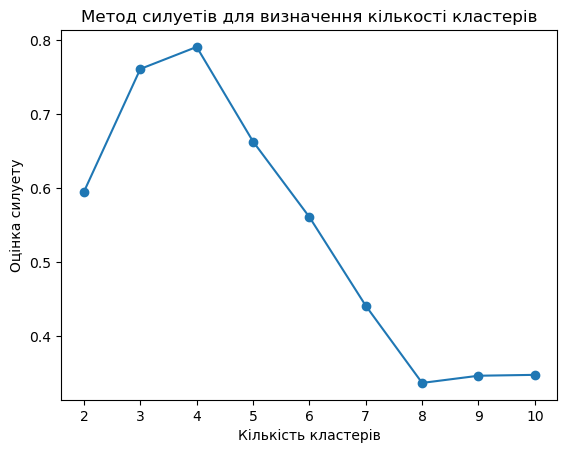

In [130]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Оцінка силуету')
plt.title('Метод силуетів для визначення кількості кластерів')
plt.show()


c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


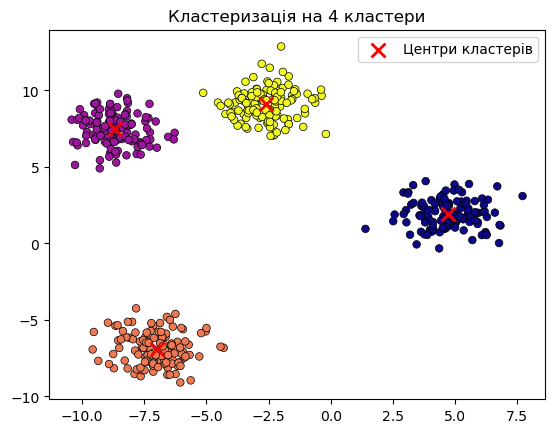

In [134]:
optimal_clusters = 4

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=30, edgecolor='black', linewidth=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x', linewidth=2, label='Центри кластерів')
plt.title(f'Кластеризація на {optimal_clusters} кластери')
plt.legend()
plt.show()


Дані успішно згруповано в чотири кластери за допомогою кластеризаційного алгоритму. Кластери чітко відокремлені, а їхні центри добре помітні. Розміри та форма кластерів є подібними, що вказує на рівномірний розподіл даних навколо центрів.